# ResNet18 on CIFAR10
---

1) Used Resnet18 model from [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used data loader, model loading, train, and test code to train ResNet18 on Cifar10

3) Best Test Accuracy = 93.67%, Final Test accuracy = 93.67%, number of epochs = 50. 

4) Used image augmentation with Cutout

[Link to Google Colab Code File](https://colab.research.google.com/drive/1-ciM_PB0V9dACZEOxtz7BLjbzD18bpIM)

[Link to API](https://github.com/genigarus/EVA4/tree/master/API)

## Installations

In [0]:
!pip install albumentations==0.4.5

     |████████████████████████████████| 122kB 1.4MB/s 
     |████████████████████████████████| 634kB 4.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=d7bf05914ccfec39cefb54d3cd312fcb7dafbbe8fef98d2e7debdd6be348ba8e
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=58b07388b4a04fde0bb1282513df06e4bfe7372708a59a062e08e366f8e808dc
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Google Drive Connection

In [0]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [0]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


# Imports

In [0]:
from __future__ import print_function
import numpy
import torch
import torchvision
from torch.optim.lr_scheduler import ReduceLROnPlateau

%matplotlib inline
import matplotlib.pyplot as plt

# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torchvision import datasets, transforms

# Model

In [0]:
from models import *

# Training Code


In [0]:
from training_testing import train

# Testing Code

In [0]:
from training_testing import test

# Regularization

In [0]:
from regularization import *

# Dataloader/Transformations/Image-augmentations


In [0]:
from data_engine import *

# Misc Items like finding misclassified images

In [0]:
from utility import *
from grad_cam import *

# LR Finder

In [0]:
from torch_lr_finder import *

  pip install torch-lr-finder -v --global-option="amp"


# Execution(Run model for 50 epochs)

In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session10"

## Generating Data Loaders

In [0]:
SEED = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
DATA_PATH = PATH+'/data'
need_albumentation = True
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

train_loader, test_loader = generate_train_test_loader(DATA_PATH, SEED, means, stdevs, need_albumentation)

Files already downloaded and verified
Files already downloaded and verified


airplane   cat   dog airplane horse


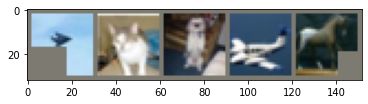

In [0]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:5]))
# print labels
print(' '.join('%5s' % CIFAR10_CLASS_LABELS[labels[j]] for j in range(5)))

# Finding LR
----
There are infinite numbers in the ocean of LR.

We're looking for one(to start off).

![alt text](https://raw.githubusercontent.com/genigarus/EVA4/master/S10/Assets/finding_nemo_lr.jpg)


Learning rate search finished. See the graph with {finder_name}.plot()


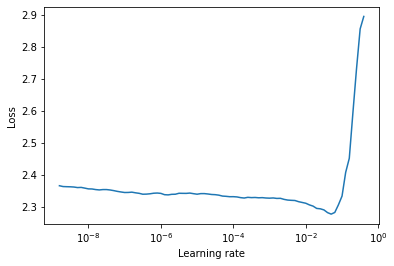

In [0]:
inp_size = (3, 32, 32)
device = set_device()

model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-10, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

### Plotting the start and end of the steepest curve on the above LR-finder graph

Start is found by inspecting the graph and end is simply the minima in the graph

85


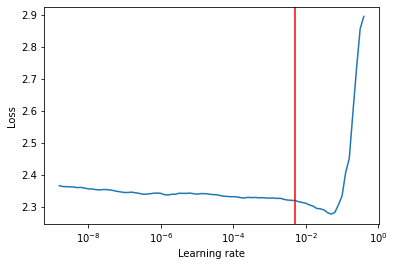

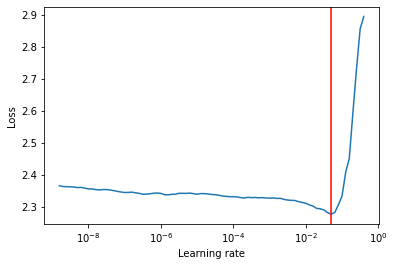

In [0]:
for index in range(len(lr_finder.history['loss'])):
  item = lr_finder.history['loss'][index]
  if item == lr_finder.best_loss:
    min_val_index = index
    print(f"{min_val_index}")

lr_finder.plot(show_lr=lr_finder.history['lr'][75])
lr_finder.plot(show_lr=lr_finder.history['lr'][min_val_index])

The appropriate LR is value which lies in between the above range.

(Congratulation! We found Nemo, sorry LR!)

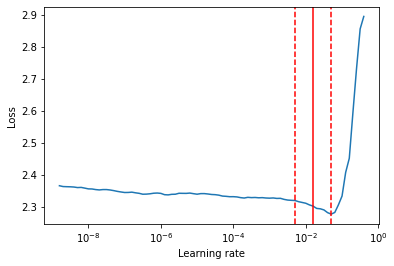

In [0]:
val_index = 75
mid_val_index = math.floor((val_index + min_val_index)/2)
show_lr=[{'data': lr_finder.history['lr'][val_index], 'linestyle': 'dashed'}, {'data': lr_finder.history['lr'][mid_val_index], 'linestyle': 'solid'}, {'data': lr_finder.history['lr'][min_val_index], 'linestyle': 'dashed'}]
lr_finder.plot_best_lr(skip_start=10, skip_end=5, log_lr=True, show_lr=show_lr, ax=None)

In [0]:
best_lr = lr_finder.history['lr'][mid_val_index]
print(f"LR to be used: {best_lr}")

LR to be used: 0.01584893192461112


# Training Model

  0%|          | 0/391 [00:00<?, ?it/s]

**************************************************
********** With Resnet18 model **********
**************************************************

 Initializing...
Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1

Loss=2.15325665473938 Batch_id=390 Accuracy=43.85: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 5419/10000 (54.19%)

EPOCH: 2


Loss=2.012441873550415 Batch_id=390 Accuracy=60.02: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6524/10000 (65.24%)

EPOCH: 3


Loss=1.6384177207946777 Batch_id=390 Accuracy=67.32: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6519/10000 (65.19%)

EPOCH: 4


Loss=1.7387962341308594 Batch_id=390 Accuracy=71.24: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7264/10000 (72.64%)

EPOCH: 5


Loss=1.4806256294250488 Batch_id=390 Accuracy=73.87: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7144/10000 (71.44%)

EPOCH: 6


Loss=1.2457722425460815 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7764/10000 (77.64%)

EPOCH: 7


Loss=1.3323636054992676 Batch_id=390 Accuracy=77.13: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7911/10000 (79.11%)

EPOCH: 8


Loss=1.1756545305252075 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8188/10000 (81.88%)

EPOCH: 9


Loss=1.0852481126785278 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [02:35<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8255/10000 (82.55%)

EPOCH: 10


Loss=1.4269263744354248 Batch_id=390 Accuracy=79.67: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8453/10000 (84.53%)

EPOCH: 11


Loss=0.9477803707122803 Batch_id=390 Accuracy=80.62: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8126/10000 (81.26%)

EPOCH: 12


Loss=0.9541343450546265 Batch_id=390 Accuracy=81.57: 100%|██████████| 391/391 [02:33<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8166/10000 (81.66%)

EPOCH: 13


Loss=0.9508116841316223 Batch_id=390 Accuracy=81.75: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8194/10000 (81.94%)

EPOCH: 14


Loss=0.907364010810852 Batch_id=390 Accuracy=82.21: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8018/10000 (80.18%)

EPOCH: 15


Loss=0.833751916885376 Batch_id=390 Accuracy=82.52: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8390/10000 (83.90%)

EPOCH: 16


Loss=0.6455802917480469 Batch_id=390 Accuracy=82.90: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8447/10000 (84.47%)

EPOCH: 17


Loss=0.9995672702789307 Batch_id=390 Accuracy=83.17: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8517/10000 (85.17%)

EPOCH: 18


Loss=0.872093141078949 Batch_id=390 Accuracy=83.89: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8450/10000 (84.50%)

EPOCH: 19


Loss=0.8379157781600952 Batch_id=390 Accuracy=83.82: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8513/10000 (85.13%)

EPOCH: 20


Loss=0.9011598825454712 Batch_id=390 Accuracy=84.30: 100%|██████████| 391/391 [02:35<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8483/10000 (84.83%)

EPOCH: 21


Loss=0.7680745124816895 Batch_id=390 Accuracy=84.55: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8184/10000 (81.84%)

EPOCH: 22


Loss=0.6993612051010132 Batch_id=390 Accuracy=84.64: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8578/10000 (85.78%)

EPOCH: 23


Loss=0.7411786317825317 Batch_id=390 Accuracy=84.69: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8553/10000 (85.53%)

EPOCH: 24


Loss=0.7328760027885437 Batch_id=390 Accuracy=85.22: 100%|██████████| 391/391 [02:34<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8571/10000 (85.71%)

EPOCH: 25


Loss=0.7580845355987549 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [02:34<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8702/10000 (87.02%)

EPOCH: 26


Loss=0.7757035493850708 Batch_id=390 Accuracy=85.39: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8689/10000 (86.89%)

EPOCH: 27


Loss=0.5850611925125122 Batch_id=390 Accuracy=85.91: 100%|██████████| 391/391 [02:35<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8449/10000 (84.49%)

EPOCH: 28


Loss=0.6602646112442017 Batch_id=390 Accuracy=85.84: 100%|██████████| 391/391 [02:35<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8726/10000 (87.26%)

EPOCH: 29


Loss=0.708653450012207 Batch_id=390 Accuracy=86.08: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8514/10000 (85.14%)

EPOCH: 30


Loss=0.8008662462234497 Batch_id=390 Accuracy=86.35: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8833/10000 (88.33%)

EPOCH: 31


Loss=0.636769711971283 Batch_id=390 Accuracy=86.49: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8800/10000 (88.00%)

EPOCH: 32


Loss=0.7092130184173584 Batch_id=390 Accuracy=86.39: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8792/10000 (87.92%)

EPOCH: 33


Loss=0.752608060836792 Batch_id=390 Accuracy=86.69: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8503/10000 (85.03%)

EPOCH: 34


Loss=1.0032578706741333 Batch_id=390 Accuracy=86.82: 100%|██████████| 391/391 [02:34<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8683/10000 (86.83%)

EPOCH: 35


Loss=0.7567118406295776 Batch_id=390 Accuracy=86.98: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8964/10000 (89.64%)

EPOCH: 36


Loss=0.7628611326217651 Batch_id=390 Accuracy=87.04: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8957/10000 (89.57%)

EPOCH: 37


Loss=0.7143936157226562 Batch_id=390 Accuracy=87.22: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8568/10000 (85.68%)

EPOCH: 38


Loss=0.6786922812461853 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [02:34<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8850/10000 (88.50%)

EPOCH: 39


Loss=0.797775387763977 Batch_id=390 Accuracy=87.53: 100%|██████████| 391/391 [02:33<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8826/10000 (88.26%)

EPOCH: 40


Loss=0.7024500966072083 Batch_id=390 Accuracy=87.49: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8526/10000 (85.26%)

EPOCH: 41


Loss=0.6100055575370789 Batch_id=390 Accuracy=87.59: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8939/10000 (89.39%)

EPOCH: 42


Loss=0.5923382043838501 Batch_id=390 Accuracy=87.90: 100%|██████████| 391/391 [02:35<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8674/10000 (86.74%)

EPOCH: 43


Loss=0.6672704815864563 Batch_id=390 Accuracy=87.78: 100%|██████████| 391/391 [02:34<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8787/10000 (87.87%)

EPOCH: 44


Loss=0.5858694911003113 Batch_id=390 Accuracy=87.72: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8819/10000 (88.19%)

EPOCH: 45


Loss=0.5993590950965881 Batch_id=390 Accuracy=88.05: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8878/10000 (88.78%)

EPOCH: 46


Loss=0.480996310710907 Batch_id=390 Accuracy=87.98: 100%|██████████| 391/391 [02:34<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8868/10000 (88.68%)

EPOCH: 47


Loss=0.4863784909248352 Batch_id=390 Accuracy=91.49: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 9288/10000 (92.88%)

EPOCH: 48


Loss=0.5819729566574097 Batch_id=390 Accuracy=92.66: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 9330/10000 (93.30%)

EPOCH: 49


Loss=0.4391074776649475 Batch_id=390 Accuracy=93.26: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 9347/10000 (93.47%)

EPOCH: 50


Loss=0.48527491092681885 Batch_id=390 Accuracy=93.74: 100%|██████████| 391/391 [02:34<00:00,  2.53it/s]



Test set: Average loss: 0.0015, Accuracy: 9367/10000 (93.67%)


 Saving trained model...

 Visualizing:


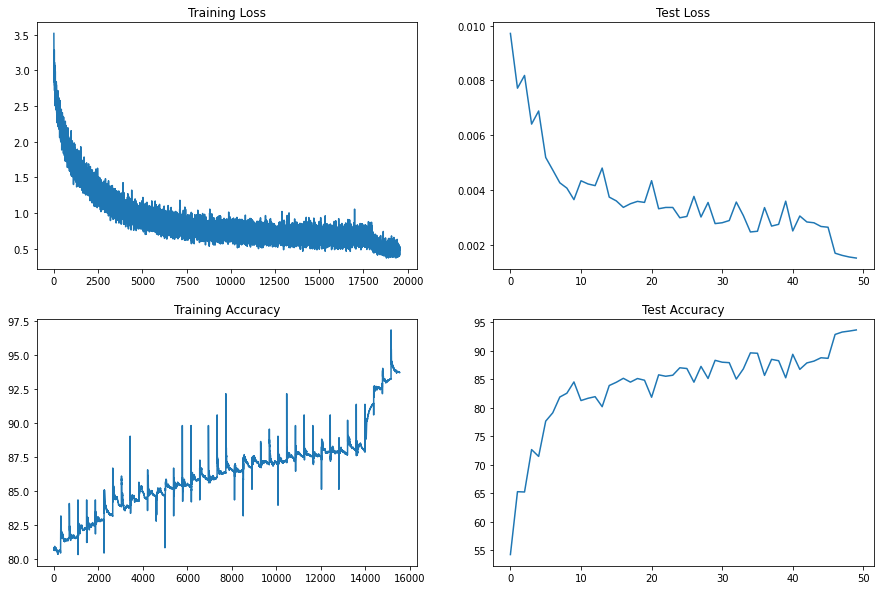

In [0]:
print("*"*50)
print("*"*10,"With Resnet18 model","*"*10)
print("*"*50)
print("\n Initializing...")
aug_l1_l2_reg_train_losses = []
aug_l1_l2_reg_test_losses = []
aug_l1_l2_reg_train_acc = []
aug_l1_l2_reg_test_acc = []
# dropout_value = 0.2
LAMBDA1=1e-5
LR=best_lr
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
inp_size = (3, 32, 32)
device = set_device()

print("Creating model...")
aug_l1_l2_model =  ResNet18().to(device)

print("\n Model Summary:")
summary(aug_l1_l2_model, input_size=inp_size)
optimizer = optim.SGD(aug_l1_l2_model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, 'min')
criterion = nn.CrossEntropyLoss()

print("\n Training the model...")
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(aug_l1_l2_model, device, train_loader, optimizer, criterion, epoch, aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, l1=True, lambda1=LAMBDA1)
    test(aug_l1_l2_model, device, criterion, test_loader, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc, scheduler=scheduler)
    
print("\n Saving trained model...")
torch.save(aug_l1_l2_model.state_dict(), PATH+"/model/cifar10_aug_model.pth")

print("\n Visualizing:")
visualize_graph(aug_l1_l2_reg_train_losses, aug_l1_l2_reg_train_acc, aug_l1_l2_reg_test_losses, aug_l1_l2_reg_test_acc)

# Visualize Training Vs Test Accuracy of Trained Model

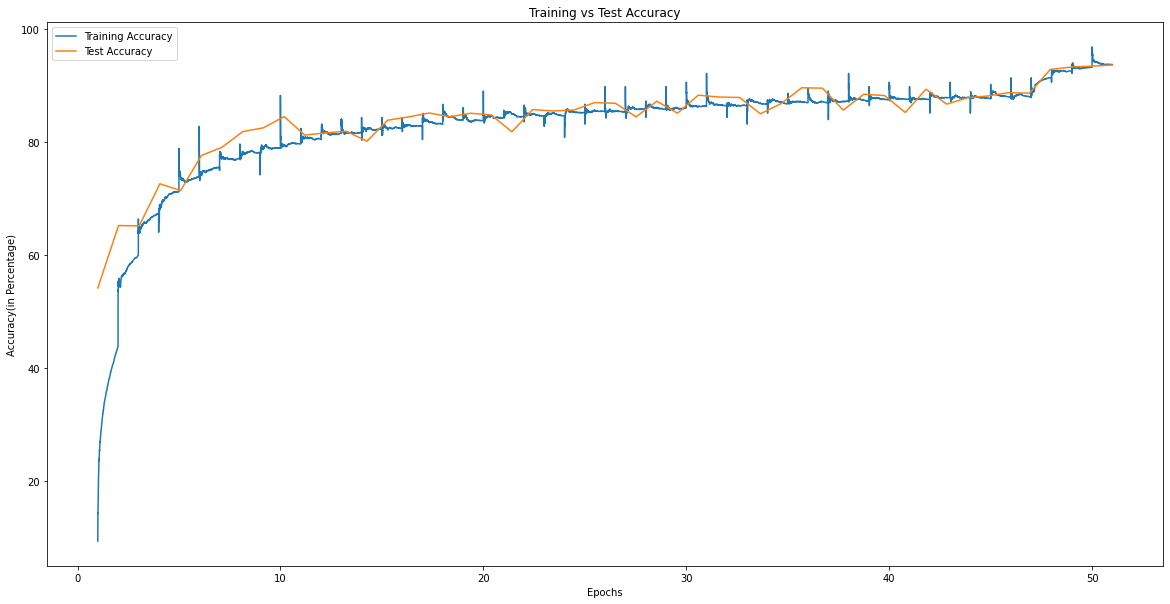

In [0]:
dict_list = {'Training Accuracy': aug_l1_l2_reg_train_acc, 'Test Accuracy': aug_l1_l2_reg_test_acc}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_graph"

visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, PATH+"/visualization", name=name)

In [0]:
# save train and test losses and accuracies
train_test_data = {"Training Loss": aug_l1_l2_reg_train_losses, "Test Loss": aug_l1_l2_reg_test_losses, "Training Accuracy": aug_l1_l2_reg_train_acc, "Test Accuracy": aug_l1_l2_reg_test_acc}
torch.save(train_test_data, PATH+'/model/cifar10_aug_model_train_test_params.pt')

In [0]:
# #param load
# abc = torch.load(PATH+'/model/cifar10_aug_model_train_test_params.pt')

# Load Saved Model
---

In [0]:
inp_size = (3, 32, 32)
device = set_device()
model_path = PATH + "/model/cifar10_aug_model.pth"
aug_l1_l2_model =  ResNet18().to(device)
aug_l1_l2_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# View Correctly Classified Images
---

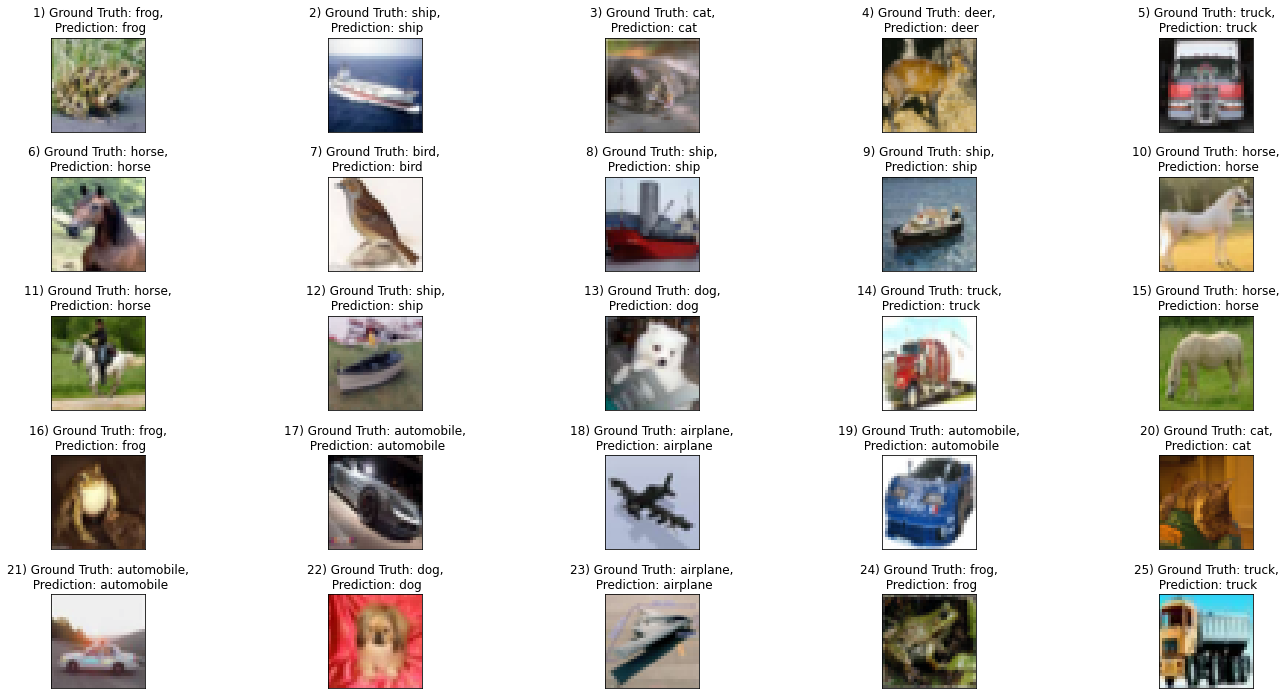

In [0]:
show_save_correctly_classified_images(aug_l1_l2_model, test_loader, device, PATH, name="correctly_classified_imgs", max_correctly_classified_images_imgs=25)

# View Incorrectly Classified Images
---

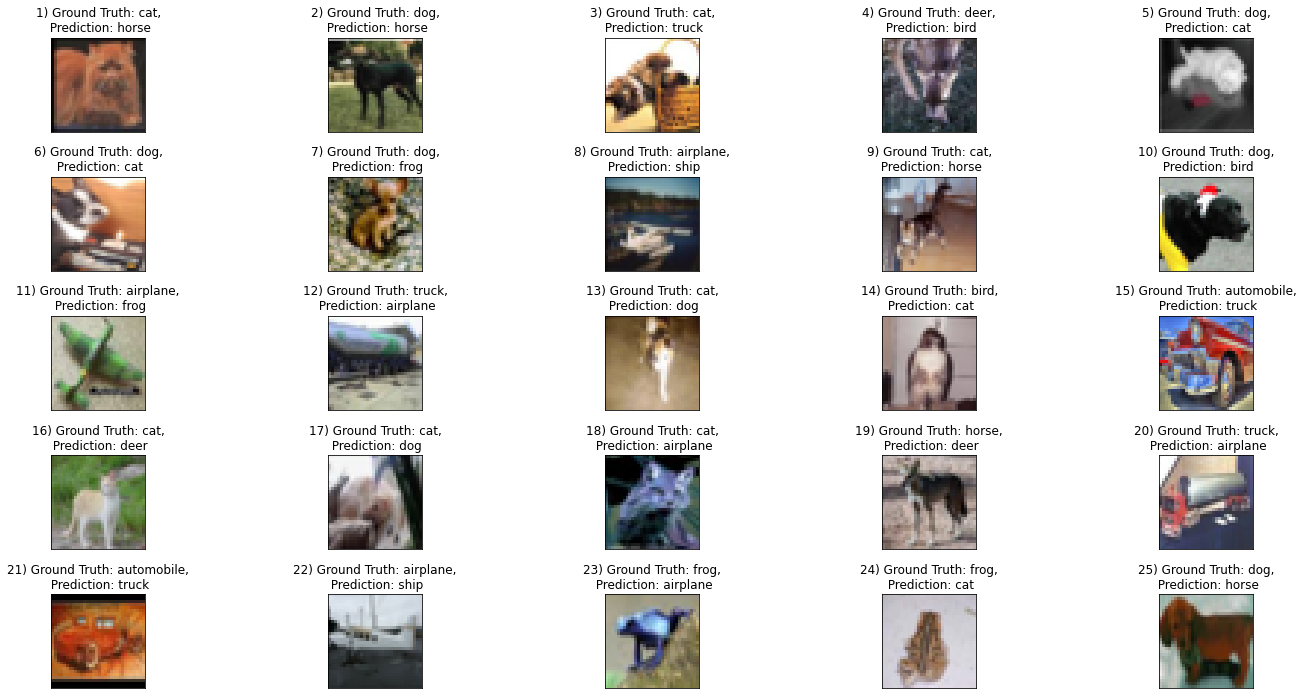

In [0]:
show_save_misclassified_images(aug_l1_l2_model, test_loader, device, PATH, name="misclassified_imgs", max_misclassified_imgs=25)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [0]:
misclassified_imgs, correctly_classified_images = classify_images(aug_l1_l2_model, test_loader, device, 25)

In [0]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(aug_l1_l2_model, CIFAR10_CLASS_LABELS, target_layers)

## For correctly classified images:-

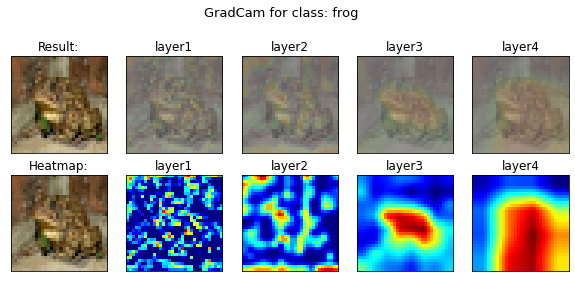

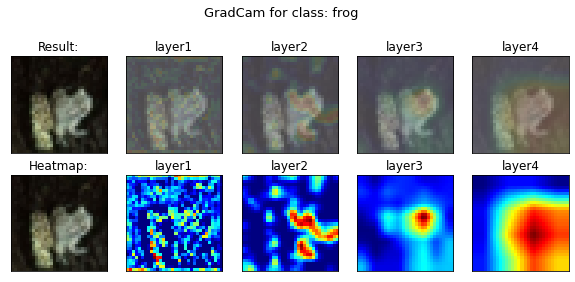

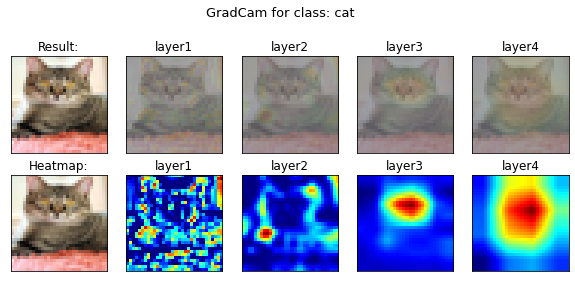

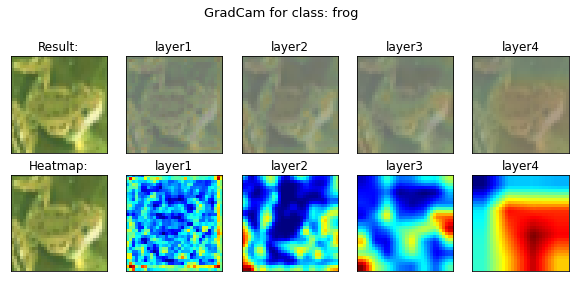

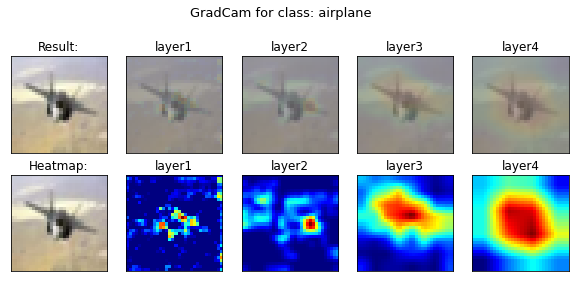

In [0]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH+"/visualization", metric="correct")

## For misclassified images:-

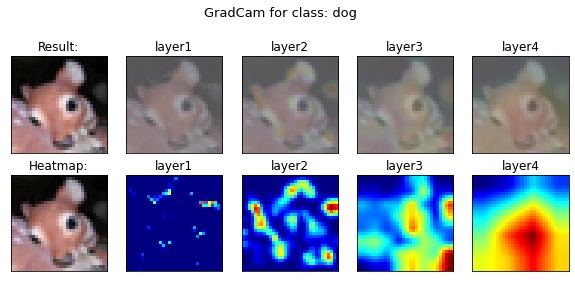

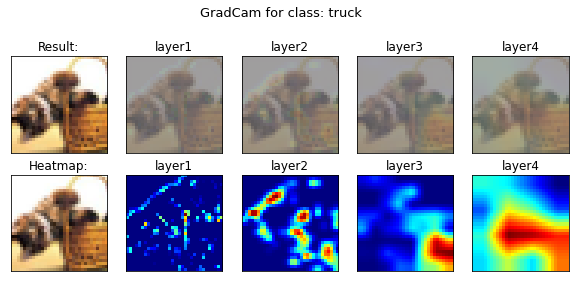

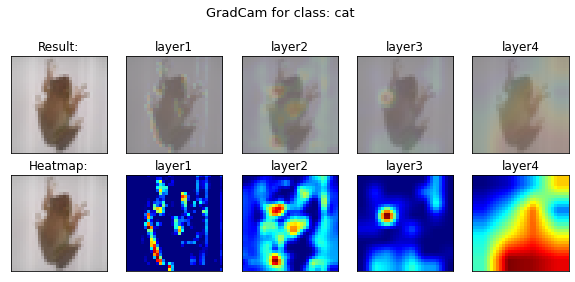

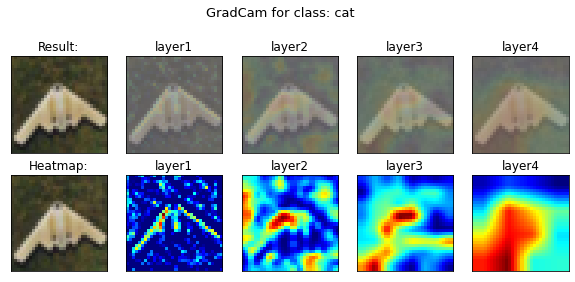

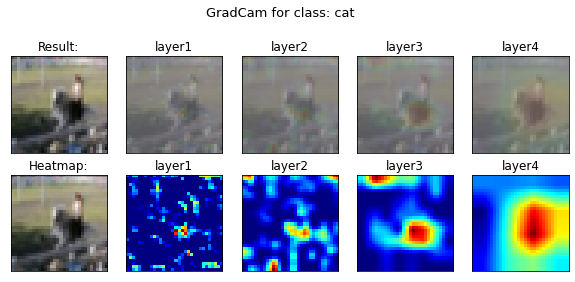

In [0]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH+"/visualization", metric="incorrect")

# Grad-CAM for 25 misclassified images

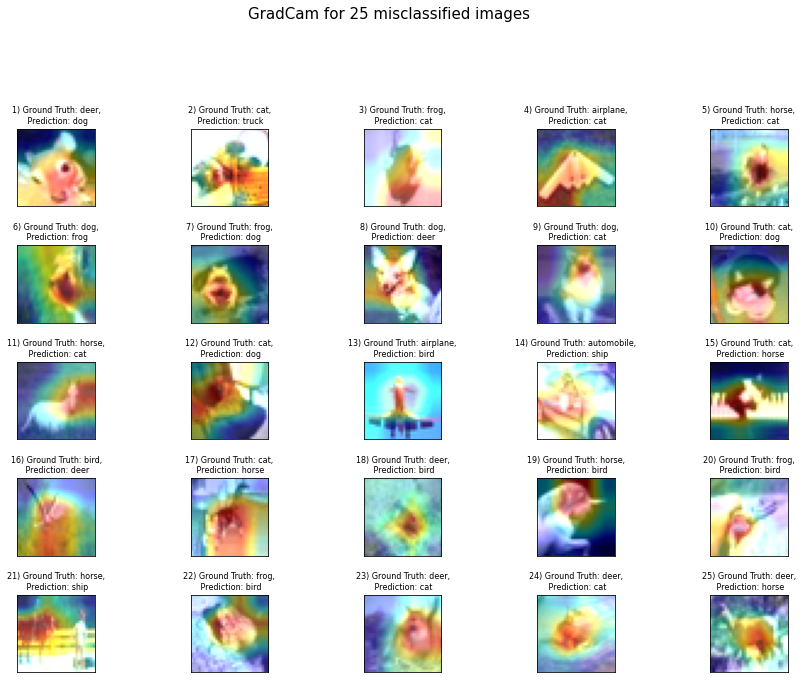

In [0]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")

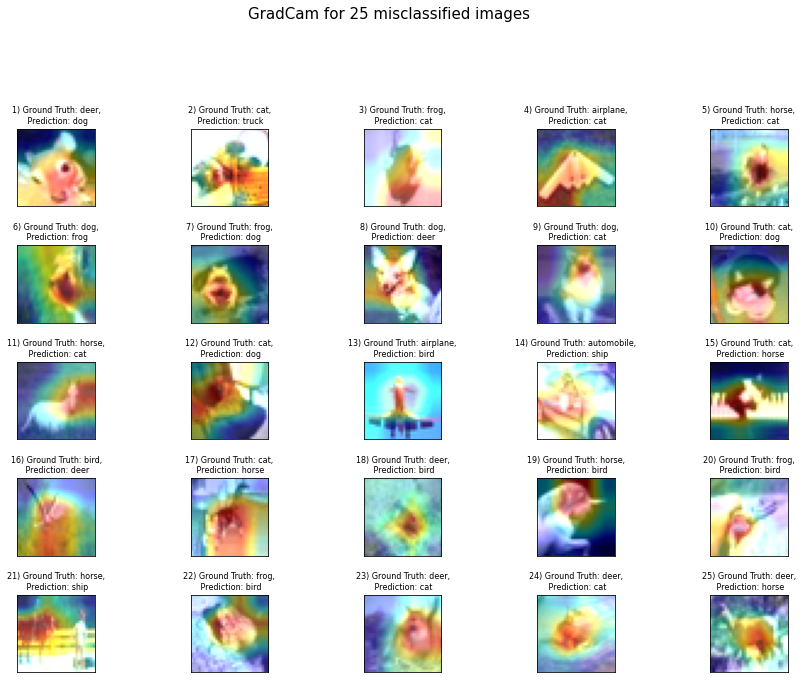

In [0]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images_1")